# Coding Temple's Data Analytics Program:
---
## Python for DA: Machine Learning Assignment

For your assignment today, you will look through the [UCI Irvine ML Repository](https://archive.ics.uci.edu/datasets) to find a dataset that you can build a model on. Your workflow should look something like:

- Import any necessary libraries
- Load in the data
- Clean/Tidy the Data
- Explore the data:
    - Gather all summary statistics
    - Visualize your data and your target
    - Identify any relationships between your target and the feature matrix
    - Loop back through and continue cleaning data/feature engineering as needed
- Split the data
- Establish a baseline model
- Create model
- Establish model accuracy
- Hypertune your model
- Communicate your results

The model, data, and methods you use are all completely up to you for this assignment! Ensure you label your notebook with markdown cells and proper comments

In [1]:
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, roc_auc_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier, XGBRegressor

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

/Users/investmentguy/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


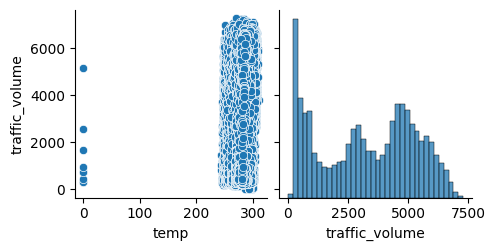

In [26]:
df = pd.read_csv(r'/Users/investmentguy/Documents/python_stuff/coding_temple/week4/day3/Metro_Interstate_Traffic_Volume.csv')
df

df.drop(['holiday', 'rain_1h','snow_1h', 'clouds_all','date_time'], axis=1, inplace=True)
df
df1 = (df['traffic_volume'].isnull() == False)

sns.pairplot(df,y_vars=['traffic_volume'])

In [3]:
# Traffic volume becomes the dependent variable and the other columns will become the independent. 

# Step 1: Identify the target vector
target = 'traffic_volume'

# Step 2: Separate the target vector from the feature matrix
x = df.drop(columns=target)

# Create the 1-D Target Vector:
y = df[target]

# Step 3: Split the data into a training and testing set, using sklearn
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=.8, random_state=42)

# View our testing data
display(x_test)
print(y_test)

# Assert statement to double-check our work: Split the data into training and testing set using sklearn
assert len(x_train) + len(x_test) == len(x), 'You did not separate the data properly'

,temp,weather_main,weather_description
35748,289.49,Fog,fog
147,279.35,Clear,sky is clear
24362,291.39,Clouds,scattered clouds
35495,294.02,Thunderstorm,thunderstorm
11010,268.69,Mist,mist
...,...,...,...
6401,287.38,Thunderstorm,proximity thunderstorm with rain
34004,286.48,Clear,sky is clear
46086,294.82,Clouds,few clouds
42579,275.86,Clouds,overcast clouds


35748    6364
147      2030
24362     708
35495    2029
11010    3734
         ... 
6401     2491
34004    5251
46086    2224
42579    2928
23709     910
Name: traffic_volume, Length: 9641, dtype: int64


In [ ]:
filter= (df['temp', 'weather_main', 'weather_description', 'traffic_volume'].isnull() == False)

In [4]:
# Establish a baseline: The baseline is always the mean of your target vector, which in this case the mean of the traffice volume
# This will allow us to plug in the baseline(mean of the price) along our models as well as the 6028 columns found in the total columns 
baseline = [df1.traffic_volume.mean()]* len(df)
baseline
round(df1.traffic_volume.mean(),2)

3259.82

In [27]:
df1

0        True
1        True
2        True
3        True
4        True
         ... 
48199    True
48200    True
48201    True
48202    True
48203    True
Name: traffic_volume, Length: 48204, dtype: bool

In [5]:
# Step 1: Instantiate our Encoder
ohe = OneHotEncoder(use_cat_names=True)

# Step 2: Fit the Encoder
ohe.fit(x_train, y_train)

# Step 3: Transform our data
x_trans = ohe.transform(x_train)

# Step 4: Instantiate the model object
model_lr = LinearRegression()

# Step 5: Fit the model object
model_lr.fit(x_trans, y_train)

LinearRegression()

In [6]:
# Step 1a: Create the pipeline object
model_lr = make_pipeline(
    # Step 1b: Add in any preprocessors to the pipeline
 OneHotEncoder(use_cat_names=True),
    # Step 1c: Add in the model object to the pipeline
    LinearRegression()
)

# Step 2: Fit the pipeline
model_lr.fit(x_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['weather_main', 'weather_description'],
                               use_cat_names=True)),
                ('linearregression', LinearRegression())])

In [7]:
# Below is how to run the pipeline above
# Step 1a: Create the pipeline object
pipe_dt = make_pipeline(
    # Step 1b: Add in any preprocessors to the pipeline
    OneHotEncoder(use_cat_names=True),
    # Step 1c: Add in the model object to the pipeline
    DecisionTreeRegressor(random_state=42)
)

# Step 2: Fit the pipeline
pipe_dt.fit(x_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['weather_main', 'weather_description'],
                               use_cat_names=True)),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [8]:
# Step 1a: Create the pipeline object
model_rf = make_pipeline(
    # Step 1b: Add in any preprocessors to the pipeline
    OneHotEncoder(use_cat_names=True),
    # Step 1c: Add in the model object to the pipeline
    RandomForestRegressor(random_state=42)
)

# Step 2: Fit the pipeline
model_rf.fit(x_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['weather_main', 'weather_description'],
                               use_cat_names=True)),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [14]:
# Step 1a: Create the pipeline object
model_xgb = make_pipeline(
    # Step 1b: Add in any preprocessors to the pipeline
    OneHotEncoder(use_cat_names=True),
    # Step 1c: Add in the model object to the pipeline
    XGBRegressor(random_state=42)
)

# Step 2: Fit the pipeline
model_xgb.fit(x_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['weather_main', 'weather_description'],
                               use_cat_names=True)),
                ('xgbregressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None...one,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=42, ...))])

In [10]:
model_lr.predict(x_train)

array([3246.4140625, 3090.4921875, 3043.0234375, ..., 3793.1875   ,
       3370.21875  , 3545.8359375])

In [16]:
print('Mean Absolute Error Scores:')
print('--------------------------')
print('Baseline Model: ')
print(round(mean_absolute_error(y, baseline),2))
print('------------------------------')
print('Linear Model: ')
print(f'Training error: {round(mean_absolute_error(y_train, model_lr.predict(x_train)),2)}')
print(f'Testing Error: {round(mean_absolute_error(y_test, model_lr.predict(x_test)),2)}')
print('------------------------------')
print('Decision Tree Model: ')
print(f'Training error: {round(mean_absolute_error(y_train, pipe_dt.predict(x_train)),2)}')
print(f'Testing Error: {round(mean_absolute_error(y_test, pipe_dt.predict(x_test)),2)}')
print('------------------------------')
print('Random Forest Model: ')
print(f'Training error: {round(mean_absolute_error(y_train, model_rf.predict(x_train)),2)}')
print(f'Testing Error: {round(mean_absolute_error(y_test, model_rf.predict(x_test)),2)}')
print('------------------------------')
print('XGBoosted Model: ')
print(f'Training error: {round(mean_absolute_error(y_train, model_xgb.predict(x_train)),2)}')
print(f'Testing Error: {round(mean_absolute_error(y_test, model_xgb.predict(x_test)),2)}')


Mean Absolute Error Scores:
--------------------------
Baseline Model: 
1745.05
------------------------------
Linear Model: 
Training error: 1693.01
Testing Error: 1694.54
------------------------------
Decision Tree Model: 
Training error: 752.71
Testing Error: 1942.53
------------------------------
Random Forest Model: 
Training error: 1013.05
Testing Error: 1772.81
------------------------------
XGBoosted Model: 
Training error: 1565.64
Testing Error: 1651.99


Based on the MAE, the linear model would be a better model due to the fact that there's barely any degradation between the training error versus the testing error, so by applying this model to data that it has never seen before in a real world application, it will respond better than the other models. The Decision Tree Model would be the least applicable model of out all due to the huge degree of degradation from the training error as compared to testing error.

In [18]:
print('Mean Square Error Scores:')
print('--------------------------')
print('Baseline Model: ')
print(round(mean_squared_error(y, baseline),2))
print('------------------------------')
print('Linear Model: ')
print(f'Training error: {round(mean_squared_error(y_train, model_lr.predict(x_train)),2)}')
print(f'Testing Error: {round(mean_squared_error(y_test, model_lr.predict(x_test)),2)}')
print('------------------------------')
print('Decision Tree Model: ')
print(f'Training error: {round(mean_squared_error(y_train, pipe_dt.predict(x_train)),2)}')
print(f'Testing Error: {round(mean_squared_error(y_test, pipe_dt.predict(x_test)),2)}')
print('------------------------------')
print('Random Forest Model: ')
print(f'Training error: {round(mean_squared_error(y_train, model_rf.predict(x_train)),2)}')
print(f'Testing Error: {round(mean_squared_error(y_test, model_rf.predict(x_test)),2)}')
print('------------------------------')
print('XGBoosted Model: ')
print(f'Training error: {round(mean_squared_error(y_train, model_xgb.predict(x_train)),2)}')
print(f'Testing Error: {round(mean_squared_error(y_test, model_xgb.predict(x_test)),2)}')

Mean Square Error Scores:
--------------------------
Baseline Model: 
3947533.43
------------------------------
Linear Model: 
Training error: 3790860.1
Testing Error: 3789570.06
------------------------------
Decision Tree Model: 
Training error: 1426302.8
Testing Error: 5905037.3
------------------------------
Random Forest Model: 
Training error: 1694148.9
Testing Error: 4677370.41
------------------------------
XGBoosted Model: 
Training error: 3318550.3
Testing Error: 3673092.74


Based on the MSE, the Linear Model still preforms better than the other models. In fact, there was less error produced from the Testing Error than the training. 

In [30]:
print('R2 Accuracy Scores:')
print('--------------------------')
print('Baseline Model: ')
print(round(r2_score(y, baseline),2))
print('------------------------------')
print('Linear Model: ')
print(f'Training error: {round(r2_score(y_train, model_lr.predict(x_train)),2)}')
print(f'Testing Error: {round(r2_score(y_test, model_lr.predict(x_test)),2)}')
print('------------------------------')
print('Decision Tree Model: ')
print(f'Training error: {round(r2_score(y_train, pipe_dt.predict(x_train)),2)}')
print(f'Testing Error: {round(r2_score(y_test, pipe_dt.predict(x_test)),2)}')
print('------------------------------')
print('Random Forest Model: ')
print(f'Training error: {round(r2_score(y_train, model_rf.predict(x_train)),2)}')
print(f'Testing Error: {round(r2_score(y_test, model_rf.predict(x_test)),2)}')
print('------------------------------')
print('XGBoosted Model: ')
print(f'Training error: {round(r2_score(y_train, model_xgb.predict(x_train)),2)}')
print(f'Testing Error: {round(r2_score(y_test, model_xgb.predict(x_test)),2)}')

R2 Accuracy Scores:
--------------------------
Baseline Model: 
0.0
------------------------------
Linear Model: 
Training error: 0.04
Testing Error: 0.04
------------------------------
Decision Tree Model: 
Training error: 0.64
Testing Error: -0.49
------------------------------
Random Forest Model: 
Training error: 0.57
Testing Error: -0.18
------------------------------
XGBoosted Model: 
Training error: 0.16
Testing Error: 0.07


Based on the R2 Accuracy Scores, there is a need of fine tuning the data to determine where I may be able to clean and/or investigate further to determine the reason for the variance shown above. The Linear Model is only able to predict 4% of it's data. The results of the other models displays an even steeper degree of inaccuracy.

In [31]:
# Hyperparameter tuning of our model that served as the best option to use as our further studies
# We must call to the pieces of the pipeline
# Step 1: Create a parameter grid
param_grid = {
    'XGBoostedegressor__n_estimators': range(200,400, 100),
    'XGBoostedregressor__max_depth' : range(20,100, 20),
    'XGBoostedregressor__min_samples_split' : [2,5,10],
    'XGBoostedregressor__min_samples_leaf' : [1,2,5]
}

# Step 2: Instantiate the RSCV module with the model object and the param_grid object
clf = RandomizedSearchCV(model_xgb, param_grid)

# Step 3: Fit the data
clf.fit(x_train)

ValueError: Invalid parameter 'XGBoostedregressor' for estimator Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['weather_main', 'weather_description'],
                               use_cat_names=True)),
                ('xgbregressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None...one,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=42, ...))]). Valid parameters are: ['memory', 'steps', 'verbose'].